# Descriptives

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read in the air quality data (nitrogen dioxide)
file = ("Big Data Challenge_ Data and Challenge Statements/Data/Data for analysis/LDN_airquality.csv")
date = ['Date']
london_air_quality = (
    pd
    .read_csv(file, 
              usecols = ['Date', 'Nitrogen Dioxide_ugm-3_LDN'], 
              parse_dates=date)
)
print(london_air_quality.head())
print(london_air_quality.info())


        Date  Nitrogen Dioxide_ugm-3_LDN
0 2017-01-01                   31.797561
1 2017-01-02                   47.625581
2 2017-01-03                   49.187805
3 2017-01-04                   43.479070
4 2017-01-05                   31.907500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1339 non-null   datetime64[ns]
 1   Nitrogen Dioxide_ugm-3_LDN  1339 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 21.0 KB
None


## How does nitrogen dioxide measured in London compare in 2020 to previous years?

In [5]:
# Average nitrogen dioxide in 2020 compared to previous years
london_air_quality.loc[:,'Year'] = london_air_quality.loc[:,'Date'].dt.year
london_air_quality.loc[:,'Month'] = london_air_quality.loc[:,'Date'].dt.month_name()

avg_annual_NO2 = london_air_quality.groupby('Year')['Nitrogen Dioxide_ugm-3_LDN'].mean()

pcnt_change_annual_NO2 = avg_annual_NO2.pct_change()

print("The average nitrogen dioxide (ug m-3) measured in London by year is ...")
print(avg_annual_NO2)


print("Between 2017 and 2018 average annual nitrogen dioxide (ug m-3) in London changed by %4.2f" %(pcnt_change_annual_NO2.iloc[1]*100) + " percent")
print("Between 2018 and 2019 average annual nitrogen dioxide (ug m-3) in London changed by %4.2f" %(pcnt_change_annual_NO2.iloc[2]*100) + " percent")
print("Between 2019 and 2020 average annual nitrogen dioxide (ug m-3) in London changed by %4.2f" %(pcnt_change_annual_NO2.iloc[3]*100) + " percent")
print("NOTE: 2020 measures have not been completed nor ratified")

The average nitrogen dioxide (ug m-3) measured in London by year is ...
Year
2017    44.395927
2018    41.856348
2019    38.989578
2020    25.792083
Name: Nitrogen Dioxide_ugm-3_LDN, dtype: float64
Between 2017 and 2018 average annual nitrogen dioxide (ug m-3) in London changed by -5.72 percent
Between 2018 and 2019 average annual nitrogen dioxide (ug m-3) in London changed by -6.85 percent
Between 2019 and 2020 average annual nitrogen dioxide (ug m-3) in London changed by -33.85 percent
NOTE: 2020 measures have not been completed nor ratified


### Wow, 2020 overall saw a reduction in nitrogen dioxide of 34%

# For the month of April, how does nitrogen dioxide measured in London compare to previous years?

In [6]:
# Average nitrogen dioxide for the month of April in 2020 compared to previous years
April_avg_annual_NO2 = london_air_quality[london_air_quality['Month'] == 'April'].groupby([london_air_quality['Year'], 'Month']).mean()

April_pcnt_change_annual_NO2 = April_avg_annual_NO2.pct_change()
April_pcnt_change_annual_NO2 = April_pcnt_change_annual_NO2['Nitrogen Dioxide_ugm-3_LDN']

print("The average nitrogen dioxide (ug m-3) measured in London, in April, separated by year is ...")
print(April_avg_annual_NO2['Nitrogen Dioxide_ugm-3_LDN'])


print("Between 2017 and 2018 average nitrogen dioxide (ug m-3) in London, in April, changed by %4.2f" %(April_pcnt_change_annual_NO2.iloc[1]*100) + " percent")
print("Between 2018 and 2019 average nitrogen dioxide (ug m-3) in London, in April, changed by %4.2f" %(April_pcnt_change_annual_NO2.iloc[2]*100) + " percent")
print("Between 2019 and 2020 average  nitrogen dioxide (ug m-3) in London, in April, changed by %4.2f" %(April_pcnt_change_annual_NO2.iloc[3]*100) + " percent")
print("NOTE: 2020 measures have not been ratified")

The average nitrogen dioxide (ug m-3) measured in London, in April, separated by year is ...
Year  Month
2017  April    42.459979
2018  April    42.365930
2019  April    43.034161
2020  April    23.763465
Name: Nitrogen Dioxide_ugm-3_LDN, dtype: float64
Between 2017 and 2018 average nitrogen dioxide (ug m-3) in London, in April, changed by -0.22 percent
Between 2018 and 2019 average nitrogen dioxide (ug m-3) in London, in April, changed by 1.58 percent
Between 2019 and 2020 average  nitrogen dioxide (ug m-3) in London, in April, changed by -44.78 percent
NOTE: 2020 measures have not been ratified


### Wow air quality in April saw an almost 45% improvement. Of course, we are only measuring nitrogen dioxide and there are plenty of other pollutants that should be considered another time

#     

In [24]:
# Now read in the traffic data from 2020
file2 = ("Big Data Challenge_ Data and Challenge Statements/Data/Data for analysis/traffic_stringency_airquality.csv")
london_air_traffic_stringency = (
    pd
    .read_csv(file2,
              usecols = ['Date', 'Transport mode', 'Count', 'Nitrogen Dioxide_ugm-3_LDN', 'StringencyIndexForDisplay'],
              parse_dates=date)
)


london_air_traffic_stringency.loc[:,'Year'] = london_air_traffic_stringency.loc[:,'Date'].dt.year
london_air_traffic_stringency.loc[:,'Month'] = london_air_traffic_stringency.loc[:,'Date'].dt.month_name()
london_air_traffic_stringency.loc[:,'Day'] = london_air_traffic_stringency.loc[:,'Date'].dt.day

print(london_air_traffic_stringency.head())
print(london_air_traffic_stringency.info())




        Date Transport mode   Count  Nitrogen Dioxide_ugm-3_LDN  \
0 2020-03-13           Cars  284520                   31.193478   
1 2020-03-13     Motorbikes     493                   31.193478   
2 2020-03-13          Buses   18856                   31.193478   
3 2020-03-13         Trucks   18778                   31.193478   
4 2020-03-13           Vans   39596                   31.193478   

   StringencyIndexForDisplay  Year  Month  Day  
0                      12.96  2020  March   13  
1                      12.96  2020  March   13  
2                      12.96  2020  March   13  
3                      12.96  2020  March   13  
4                      12.96  2020  March   13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        804 non-null    datetime64[ns]
 1   Tr

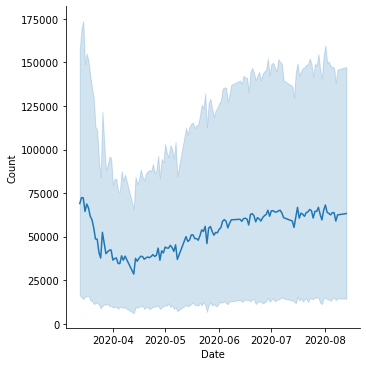

In [102]:
import seaborn as sns
sns.relplot(data=london_air_traffic_stringency, x='Date', y='Count', kind='line')

In [79]:
week_range = london_air_traffic_stringency[(london_air_traffic_stringency['Day'] >= 23) & (london_air_traffic_stringency['Day'] <= 29)]

weekly_count = week_range[['Month', 'Count', 'Transport mode']]

last_week_of_month = weekly_count.groupby([weekly_count['Month'], 'Transport mode'])['Count'].mean().reset_index()

In [120]:
last_week_of_month_cars = last_week_of_month.where(last_week_of_month['Transport mode'] == 'Cars').dropna()

# Re-order according to month
last_week_of_month_cars = last_week_of_month_cars.set_index('Month')
ordered = ['March','April','May','June','July']
last_week_of_month_cars = last_week_of_month_cars.reindex(ordered)


In [129]:
monthly_change = last_week_of_month_cars['Count'].pct_change()
print(monthly_change)



Month
March         NaN
April   -0.096314
May      0.399712
June     0.166859
July     0.026230
Name: Count, dtype: float64


In [130]:
last_week_of_month_cars

,Transport mode,Count
Month,,
March,Cars,178904.142857
April,Cars,161673.142857
May,Cars,226295.857143
June,Cars,264055.428571
July,Cars,270981.571429


In [131]:
## Read in mobillity and stringency data

In [133]:
file3 = ("Big Data Challenge_ Data and Challenge Statements/Data/Data for analysis/final_mobility_stringency_by_day.csv")
mobility = pd.read_csv(file3)

In [136]:
mobility_UK = mobility[mobility['CountryName'] == 'United Kingdom']
print(mobility_UK.head())

      Unnamed: 0     CountryName        Date  ConfirmedCases  ConfirmedDeaths  \
2552       13688  United Kingdom  2020-01-01             0.0              0.0   
2553       13689  United Kingdom  2020-01-02             0.0              0.0   
2554       13690  United Kingdom  2020-01-03             0.0              0.0   
2555       13691  United Kingdom  2020-01-04             0.0              0.0   
2556       13692  United Kingdom  2020-01-05             0.0              0.0   

      StringencyIndex  StringencyIndexForDisplay    Year    Month  day  \
2552              0.0                        0.0  2020.0  January  1.0   
2553              0.0                        0.0  2020.0  January  2.0   
2554              0.0                        0.0  2020.0  January  3.0   
2555              0.0                        0.0  2020.0  January  4.0   
2556              0.0                        0.0  2020.0  January  5.0   

      Quarter  workplaces_percent_change_from_baseline  \
2552      